In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [1]:
df <- read.csv("data/Transaction data/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [2]:
head(df)

,Order.ID,Customer.Name,Category,Sub.Category,City,Order.Date,Region,Sales,Discount,Profit,State
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
2,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
3,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
4,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
5,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
6,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu


In [7]:

df$Order_Date <- as.Date(df$Order.Date)

# Group the data by 'Order Date', 'Customer Name', and 'Sub Category', and count the occurrences
customer_purchase <- df %>%
  group_by(Order.Date, Customer.Name, Sub.Category) %>%
  summarise(Count = n()) %>%
  ungroup()

# Print the result
print(customer_purchase)

`summarise()` has grouped output by 'Order.Date', 'Customer.Name'. You can
override using the `.groups` argument.


# A tibble: 9,940 × 4
   Order.Date Customer.Name Sub.Category      Count
   <chr>      <chr>         <chr>             <int>
 1 01-01-2018 Adavan        Masalas               1
 2 01-01-2018 Ram           Soft Drinks           1
 3 01-01-2018 Rumaiza       Chicken               1
 4 01-01-2018 Sabeela       Atta & Flour          1
 5 01-01-2018 Sheeba        Breads & Buns         1
 6 01-01-2018 Surya         Edible Oil & Ghee     1
 7 01-01-2018 Vidya         Soft Drinks           1
 8 01-01-2018 Vinne         Cookies               1
 9 01-01-2018 Yadav         Cookies               1
10 01-01-2018 Yusuf         Fresh Vegetables      1
# ℹ 9,930 more rows


In [9]:
df$Order_Date <- as.Date(df$Order.Date)

# Group the data by 'Order Date' and 'Customer Name', and aggregate the sub-categories into a list
customer_purchase <- df %>%
  group_by(Order.Date, Customer.Name) %>%
  summarise(Sub_Categories = list(unique(Sub.Category))) %>%
  ungroup()

# Print the result
print(customer_purchase)

`summarise()` has grouped output by 'Order.Date'. You can override using the
`.groups` argument.


# A tibble: 8,899 × 3
   Order.Date Customer.Name Sub_Categories
   <chr>      <chr>         <list>        
 1 01-01-2018 Adavan        <chr [1]>     
 2 01-01-2018 Ram           <chr [1]>     
 3 01-01-2018 Rumaiza       <chr [1]>     
 4 01-01-2018 Sabeela       <chr [1]>     
 5 01-01-2018 Sheeba        <chr [1]>     
 6 01-01-2018 Surya         <chr [1]>     
 7 01-01-2018 Vidya         <chr [1]>     
 8 01-01-2018 Vinne         <chr [1]>     
 9 01-01-2018 Yadav         <chr [1]>     
10 01-01-2018 Yusuf         <chr [1]>     
# ℹ 8,889 more rows


In [63]:
head(customer_purchase['Sub_Categories'])

Sub_Categories
<list>
Masalas
Soft Drinks
Chicken
Atta & Flour
Breads & Buns
Edible Oil & Ghee


In [21]:
head(customer_purchase)

Order.Date,Customer.Name,Sub_Categories,Sub_Categories_Count
<chr>,<chr>,<list>,<int>
01-01-2018,Adavan,Masalas,1
01-01-2018,Ram,Soft Drinks,1
01-01-2018,Rumaiza,Chicken,1
01-01-2018,Sabeela,Atta & Flour,1
01-01-2018,Sheeba,Breads & Buns,1
01-01-2018,Surya,Edible Oil & Ghee,1


In [40]:
df1 <- customer_purchase %>%
  select(Sub_Categories,Sub_Categories_Count ) %>%
  filter(Sub_Categories_Count >= 1)


In [ ]:
transact_data <- list(df1$Sub_Categories)
transact_data

In [42]:
library(arules)
# Convert the transaction dataset to a transactions object
trans <- as(df1$Sub_Categories, "transactions")

# Perform association rule mining
rules <- apriori(trans, parameter = list(support = 0.00001, confidence = 0.5))

# Print the resulting rules
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[23 item(s), 8899 transaction(s)] done [0.00s].
sorting and recoding items ... [23 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [89 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs                      support confidence     coverage      lift count
[1]  {Atta & Flour,                                                                                  
      Rice}               => {Spices}            0.0002247444  0.6666667 0.00033711

In [57]:
# Top 15 rules based on support
top_support <- head(sort(rules, by = "support"), 5)

# Top 15 rules based on confidence
top_confidence <- head(sort(rules, by = "confidence"), 15)

# Top 15 rules based on lift
top_lift <- head(sort(rules, by = "lift"), 15)

# Print the top rules for each metric
print("Top 15 rules based on support:")
inspect(top_support)

print("Top 15 rules based on confidence:")
inspect(top_confidence)

print("Top 15 rules based on lift:")
inspect(top_lift)

[1] "Top 15 rules based on support:"
    lhs                                 rhs             support      confidence
[1] {Atta & Flour, Rice}             => {Spices}        0.0002247444 0.6666667 
[2] {Atta & Flour, Spices}           => {Rice}          0.0002247444 0.5000000 
[3] {Fresh Vegetables, Masalas}      => {Biscuits}      0.0002247444 0.6666667 
[4] {Fresh Vegetables, Soft Drinks}  => {Breads & Buns} 0.0002247444 0.5000000 
[5] {Breads & Buns, Organic Staples} => {Cookies}       0.0002247444 0.5000000 
    coverage     lift      count
[1] 0.0003371165 13.422323 2    
[2] 0.0004494887 13.565549 2    
[3] 0.0003371165 13.010234 2    
[4] 0.0004494887  8.934739 2    
[5] 0.0004494887  8.589768 2    


[1] "Top 15 rules based on confidence:"
     lhs                     rhs                      support confidence     coverage     lift count
[1]  {Masalas,                                                                                      
      Mutton}             => {Organic Staples}   0.0001123722          1 0.0001123722 23.92204     1
[2]  {Chicken,                                                                                      
      Edible Oil & Ghee,                                                                            
      Rice}               => {Soft Drinks}       0.0001123722          1 0.0001123722 13.20326     1
[3]  {Chicken,                                                                                      
      Rice,                                                                                         
      Soft Drinks}        => {Edible Oil & Ghee} 0.0001123722          1 0.0001123722 19.73171     1
[4]  {Edible Oil & Ghee,                           

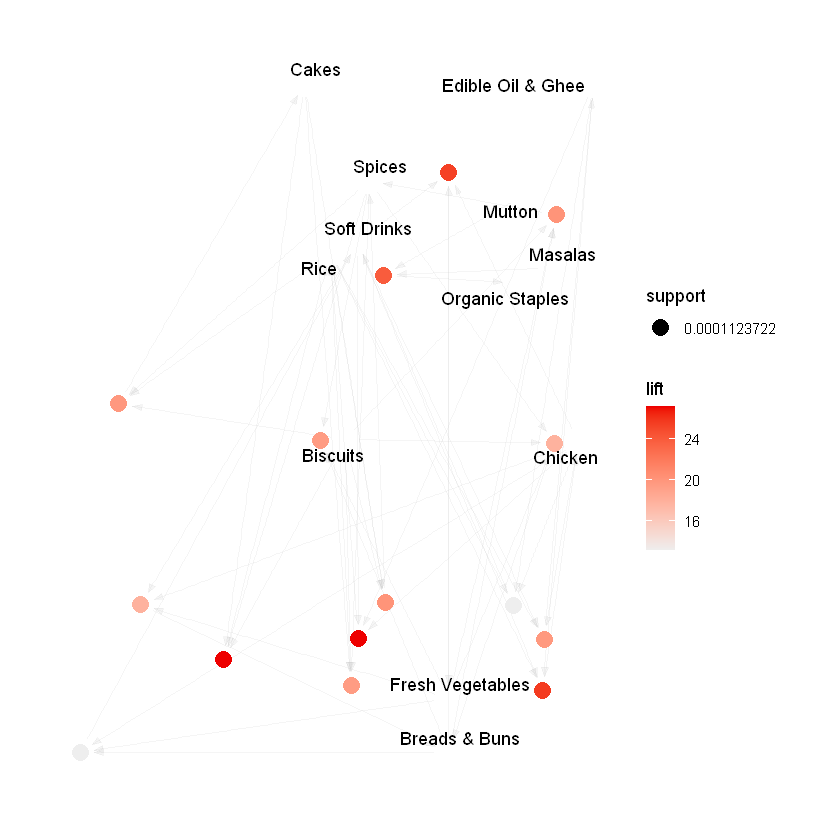

In [62]:
# Create the network graph

library(arulesViz)

network <- plot(top_confidence, method = "graph")

# Visualize the network graph
plot(network)